In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
with ZipFile('../data/train.csv.zip') as z:
    with z.open('train.csv') as f:
        train_df = pd.read_csv(f)

In [3]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

# Description

Baseline model on small subset of parameters to check submission process, training time, prediction time, predictive value of raw features

In [6]:
from catboost import CatBoostRegressor

In [111]:
features = ['region', 'city', 'parent_category_name', 'category_name', 'price', 'item_seq_number', 'user_type', 'image_top_1']
categorical = [0, 1, 2, 3, 6]
target = ['deal_probability']

In [112]:
X = train_df[features]
y = train_df[target]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
cb = CatBoostRegressor(loss_function='RMSE', verbose=10)

In [20]:
cb.fit(X_train, y_train, categorical)

0:	learn: 0.2920397	total: 984ms	remaining: 16m 23s
10:	learn: 0.2702017	total: 8.45s	remaining: 12m 39s
20:	learn: 0.2573675	total: 18.6s	remaining: 14m 28s
30:	learn: 0.2498382	total: 29s	remaining: 15m 5s
40:	learn: 0.2453050	total: 37.8s	remaining: 14m 43s
50:	learn: 0.2426673	total: 45.6s	remaining: 14m 8s
60:	learn: 0.2410699	total: 54.3s	remaining: 13m 55s
70:	learn: 0.2401033	total: 1m 2s	remaining: 13m 41s
80:	learn: 0.2393843	total: 1m 12s	remaining: 13m 37s
90:	learn: 0.2388634	total: 1m 21s	remaining: 13m 37s
100:	learn: 0.2384998	total: 1m 31s	remaining: 13m 33s
110:	learn: 0.2382215	total: 1m 40s	remaining: 13m 25s
120:	learn: 0.2379881	total: 1m 51s	remaining: 13m 33s
130:	learn: 0.2378014	total: 2m 1s	remaining: 13m 23s
140:	learn: 0.2376563	total: 2m 11s	remaining: 13m 19s
150:	learn: 0.2375254	total: 2m 19s	remaining: 13m 5s
160:	learn: 0.2373957	total: 2m 28s	remaining: 12m 53s
170:	learn: 0.2372583	total: 2m 36s	remaining: 12m 39s
180:	learn: 0.2371357	total: 2m 45s

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
pred = cb.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, pred))

0.2331558437447115

In [24]:
X_submit = test_df[features]

In [25]:
submit_preds = cb.predict(X_submit)

In [35]:
submission = pd.DataFrame()
submission['item_id'] = test_df['item_id'].copy()
submission['deal_probability'] = submit_preds

In [36]:
submission.loc[submission['deal_probability'] < 0, 'deal_probability'] = 0

In [37]:
submission.to_csv('baseline_submission.csv', index=False)

**LB score: 0.2381**

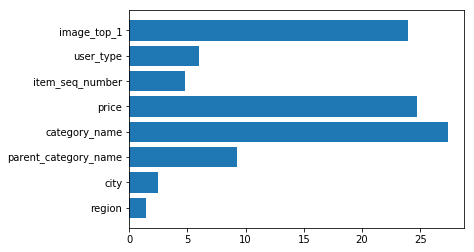

In [45]:
y = np.arange(len(features))
plt.barh(y, cb.feature_importances_)
plt.yticks(y, features);

In [161]:
from importlib import reload
import features
reload(features)
from features import extract_features

In [162]:
n, f, c = extract_features(train_df)

In [163]:
categorical1 = np.where(c)[0]

In [164]:
categorical1

array([ 0,  1,  2,  3,  4,  5,  6,  9, 10], dtype=int64)

In [165]:
X1 = np.vstack(f).T

In [166]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y)

In [168]:
cb1 = CatBoostRegressor(loss_function='RMSE', verbose=10)

In [169]:
cb1.fit(X_train1, y_train1, categorical1)

0:	learn: 0.2916657	total: 1.48s	remaining: 24m 34s
10:	learn: 0.2687238	total: 13.7s	remaining: 20m 35s
20:	learn: 0.2551426	total: 24.3s	remaining: 18m 52s
30:	learn: 0.2466022	total: 38.8s	remaining: 20m 13s
40:	learn: 0.2414116	total: 54.4s	remaining: 21m 13s
50:	learn: 0.2382237	total: 1m 10s	remaining: 21m 55s
60:	learn: 0.2361877	total: 1m 26s	remaining: 22m 16s
70:	learn: 0.2349275	total: 1m 49s	remaining: 23m 48s
80:	learn: 0.2341171	total: 2m 7s	remaining: 24m 9s
90:	learn: 0.2335193	total: 2m 25s	remaining: 24m 15s
100:	learn: 0.2330584	total: 2m 43s	remaining: 24m 14s
110:	learn: 0.2326766	total: 3m 3s	remaining: 24m 26s
120:	learn: 0.2323258	total: 3m 24s	remaining: 24m 46s
130:	learn: 0.2320856	total: 3m 46s	remaining: 25m
140:	learn: 0.2318538	total: 4m 5s	remaining: 24m 57s
150:	learn: 0.2316670	total: 4m 24s	remaining: 24m 48s
160:	learn: 0.2314866	total: 4m 42s	remaining: 24m 34s
170:	learn: 0.2313195	total: 5m	remaining: 24m 17s
180:	learn: 0.2311401	total: 5m 19s	re

In [195]:
pred1 = cb1.predict(smth)

In [196]:
np.sqrt(mean_squared_error(y_test1, pred1))

0.2273063703831818

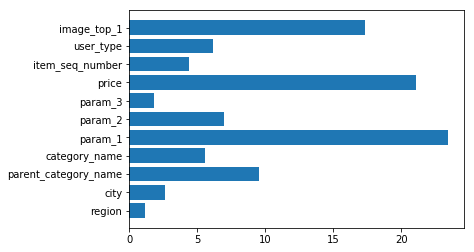

In [197]:
y = np.arange(len(n))
plt.barh(y, cb1.feature_importances_)
plt.yticks(y, n);

In [200]:
n_t, f_t, c_t = extract_features(test_df)

In [206]:
X_submit1 = np.vstack(f_t).T

In [207]:
submit_preds1 = cb1.predict(X_submit1)

In [208]:
submit_preds1.shape

(508438,)

In [209]:
submission1 = pd.DataFrame()
submission1['item_id'] = test_df['item_id'].copy()
submission1['deal_probability'] = submit_preds1

In [210]:
submission1.loc[submission1['deal_probability'] < 0, 'deal_probability'] = 0

In [211]:
submission1.to_csv('baseline_submission1.csv', index=False)